## Gradient descent basic examples with only one variable

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'cost function with learning rate 0.2')

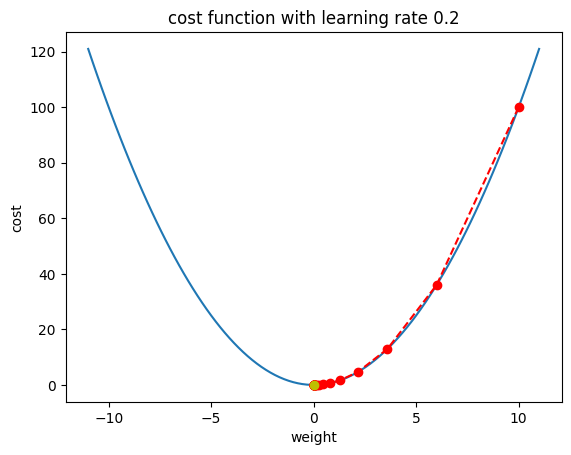

In [2]:
# establish a cost function
x = np.linspace(-11,11,100)
y = x ** 2

# initialize start params
start = 10
learning_rate = 0.2
gradient = lambda x: 2 * x
n_iter = 50

def gradient_descent(gradient, start, learning_rate, n_iter):
    vector = start
    vector_list = [start]
    for i in range(n_iter):
        diff = -learning_rate * gradient(vector)
        vector += diff
        if i != n_iter-1:
            vector_list.append(vector)
    return vector, vector_list

vector, vector_list = gradient_descent(gradient, start, learning_rate, n_iter)

plt.plot(x,y)
plt.plot(vector_list, [x ** 2 for x in vector_list], 'ro--')
plt.plot(vector, vector ** 2, 'yo')
plt.ylabel('cost')
plt.xlabel('weight')
plt.title('cost function with learning rate 0.2')

The point identified as global minima with learning rate 0.01 is : 3.641696800871171
The point identified as global minima with learning rate 0.08 is : 0.0016366819885553752
The point identified as global minima with learning rate 0.1 is : 0.00014272476927059603
The point identified as global minima with learning rate 0.2 is : 8.082812774647624e-11
The point identified as global minima with learning rate 0.8 is : 8.08281277464769e-11


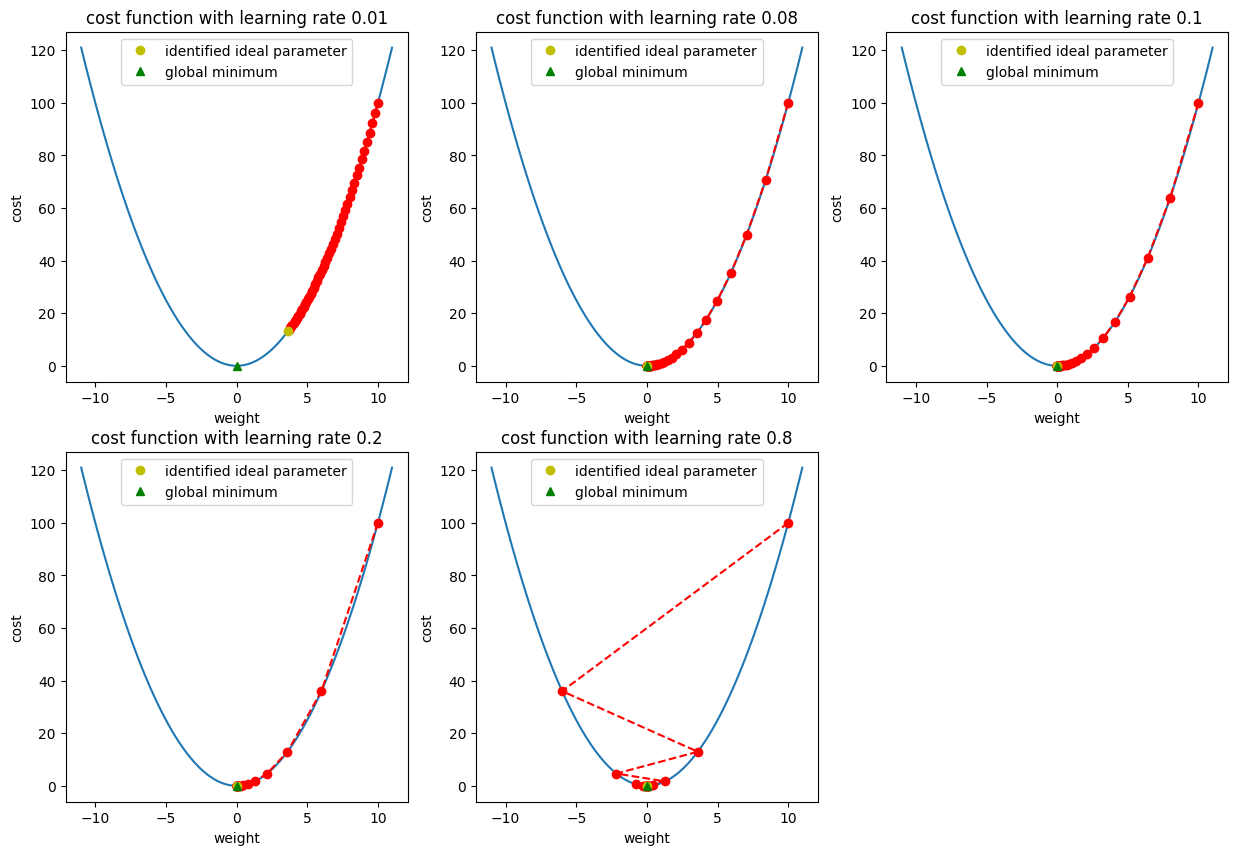

In [3]:
# compare global minima identification with distinct learning rate
lr_list = [0.01, 0.08, 0.1, 0.2, 0.8]

# draw multiple plots together
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.flatten()

# iterate through all learning rate and draw them in subplots
for lr, ax in zip(lr_list, axes):
    vector, vector_list = gradient_descent(gradient, start, lr, n_iter)
    ax.plot(x,y)
    ax.plot(vector_list, [x ** 2 for x in vector_list], 'ro--')
    ax.plot(vector, vector ** 2, 'yo', label='identified ideal parameter')
    ax.plot(0,0,'g^', label='global minimum')
    ax.set_ylabel('cost')
    ax.set_xlabel('weight')
    ax.set_title(f'cost function with learning rate {lr}')
    ax.legend()
    print(f'The point identified as global minima with learning rate {lr} is : {vector}')

axes[5].set_visible(False)

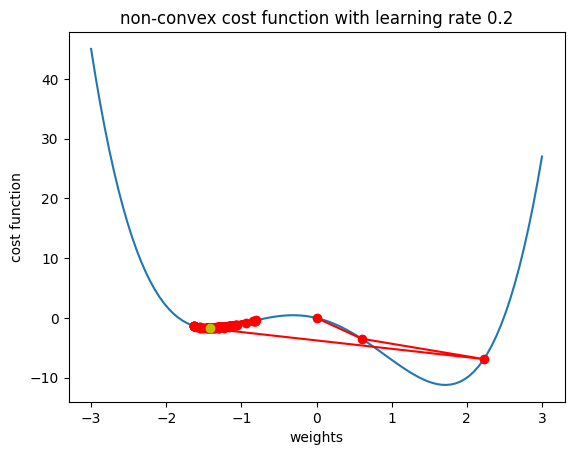

In [4]:
# situtation with nonconvext cost funtion such as v^4-5*v^2-3v
# inwhich partial derivative is 4*v^3-10*v-3
gradient = lambda x: 4 * x**3 - 10 * x - 3

# establish cost function accordingly
x = np.linspace(-3,3,100)
def cost_function(variables):
    y = variables**4 - 5 * variables**2 -3 * variables
    return y

# this time we try to start from 0 with learning_rate set to 0.2
start = 0
learning_rate = 0.2

vector, vector_list = gradient_descent(gradient, start, learning_rate, n_iter)

def plot_cf(x1, y1, x2, y2, x3, y3, learning_rate):
    plt.plot(x1,y1)
    plt.plot(x3, y3, 'ro-')
    plt.plot(x2, y2, 'yo')
    plt.title(f'non-convex cost function with learning rate {learning_rate}')
    plt.ylabel('cost function')
    plt.xlabel('weights');

plot_cf(x, cost_function(x),
       vector, cost_function(vector),
       vector_list, [cost_function(vector) for vector in vector_list],
       learning_rate)

#plt.plot(x,cost_function(x))
#plt.plot(vector, cost_function(vector), 'yo')
#plt.plot(vector_list, [cost_function(vector) for vector in vector_list], 'ro-')
#plt.title(f'non-convex cost function with learning rate {learning_rate}')
#plt.ylabel('cost function')
#plt.xlabel('weights');

when learning_rate is inappropriate selected, like this time with being set to 0.2 which is too large, especially in non-convex cost functions, the algorithm might be not able to find the global optimum as it was trapped in local minimum.

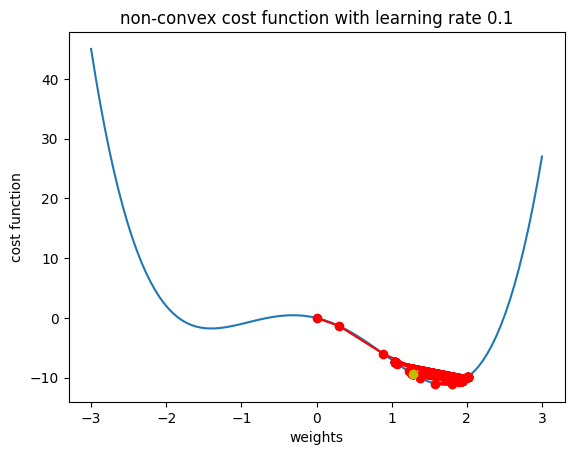

In [5]:
# when learning_rate decaies to 0.1
learning_rate = 0.1

vector, vector_list = gradient_descent(gradient, start, learning_rate, n_iter)

plot_cf(x, cost_function(x),
       vector, cost_function(vector),
       vector_list, [cost_function(vector) for vector in vector_list],
       learning_rate)

as the learning rate decays to 0.1, the algorithm managed to stick to and bounce around the neighborhood of the global minimum but its final result is still far away from the optimum value.

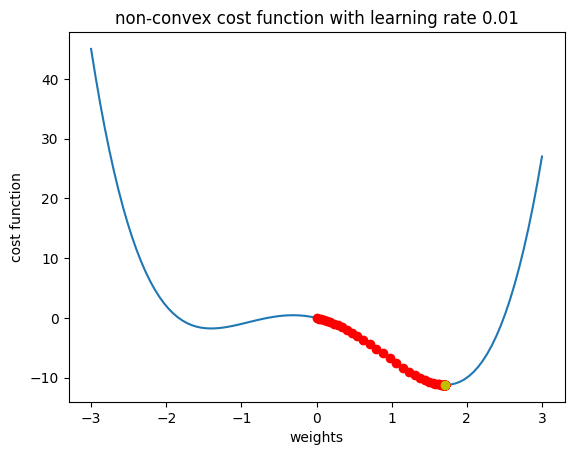

In [6]:
# when learning_rate decaies to 0.01
learning_rate = 0.01

vector, vector_list = gradient_descent(gradient, start, learning_rate, n_iter)

plot_cf(x, cost_function(x),
       vector, cost_function(vector),
       vector_list, [cost_function(vector) for vector in vector_list],
       learning_rate)

with further decrease of the learning rate to 0.01, the algorithms was finally be able to find the right optimum value by taking small steps. In this case, however, the start point and the number of iteration that are pre-defined play a significant role.

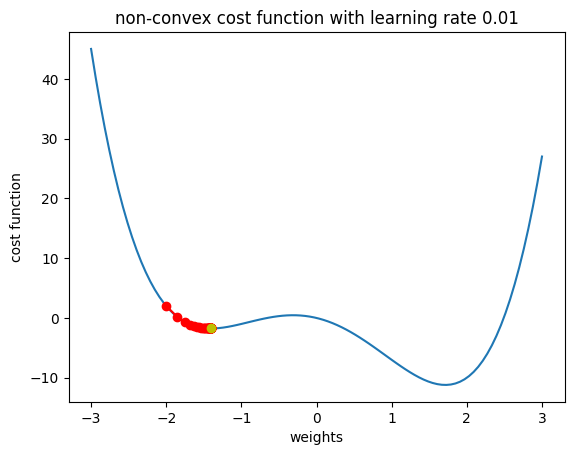

In [7]:
# when learning_rate decaies to 0.01
learning_rate = 0.01

# this time the starting point will be set to -2
start = -2

vector, vector_list = gradient_descent(gradient, start, learning_rate, n_iter)

plot_cf(x, cost_function(x),
       vector, cost_function(vector),
       vector_list, [cost_function(vector) for vector in vector_list],
       learning_rate)

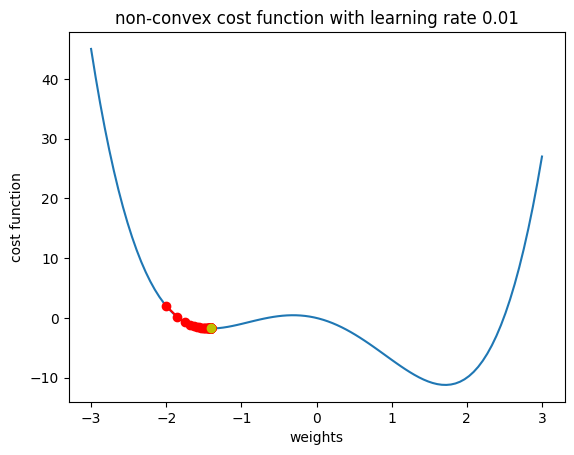

In [8]:
# when learning_rate decaies to 0.01
learning_rate = 0.01

# this time the starting point will be set to -2
start = -2

# increase number of iteration and see if the algorithm can come out of the local mininum
n_iter = 100

vector, vector_list = gradient_descent(gradient, start, learning_rate, n_iter)

plot_cf(x, cost_function(x),
       vector, cost_function(vector),
       vector_list, [cost_function(vector) for vector in vector_list],
       learning_rate)

as one can see in the above two graphs, where start was set to -2 and the number of iteration was increased to 100, the algorithm got stuck in local minimum aound -1.5.

## Gradient descent application in real-world problems with multiple independent variables

### Basic function - Gradient descent

In [101]:
# imagine we wanna build a simple linear regression model to predict the price of a apartment given x1 = the squared meter and x2 = the number of bedrooms
# in this case we assume that y(price) = W0(bias) + W1 * x1 + W2 * x2
# instead of one parameter, we start with a set of parameters in number of 3 --> W0, W1, W2
weights = np.array([1.0, 1.0, 1.0])

# the loss/cost function that we use is the mean squared error(MSE)
# the equation of mean squared error is 1/n * (y_actual - y_predicted)^2 where n is the number of total datapoints collected
# accordingly gradient is calculated as either (y_predicted - y_actual) or (y_predicted - y_actual) * x
# gradient function will also return a np.array with three elements, one for each parametrs
def basic_gradient_descent(X, y ,weights, learning_rate = 0.01):
    y_actual = y
    y_predicted = np.sum( X * weights, axis=1 ) # step 1: calculate predicted values based on the regression model
    diff = (y_predicted - y_actual).reshape((y_predicted - y_actual).shape[0],1) # the difference is a (n,) one-dimensional array with n being the number of observations in the data, however it must be reshaped into a (n,1) two-dimensional array before it is able to be used to calculate the derivative with X array (which is also a 2 dimensional array) in the next step
    derivatives = np.mean(diff * X, axis=0) # step 2: calculate the derivatives, the mean of the product of diff (n, 1) array with each column, which represents one variable per column, is calculated through numpy broadcasting function 
    step = -learning_rate * derivatives # step 3: step for each variable/feature is calculated by scaling variable derivatives with learning_rate
    # update weights
    weights += step # step 4: a set of weights is updated by add step to the former weights
    loss = np.mean((y_actual - y_predicted)**2) # step 5: loss is calculated with updated weight set 
    return weights, loss

In a normal regression problem, we will have a data table with independent variables and dependent variable, i.e. targets, in columns and different observations/samples in rows. So the first thing we will do is separate independent variables and their values and targets in matrices X and y respectively. If the original data table has a dimension of m x n, then X is a data matrix of m x (n-1) and y is m x 1. Since the X matrix does not contain the bias b and it is required for update of b in the following calculation step with db = (1) x (y_predicted - y_actual), we add a column to the X matrix with all cell being 1.

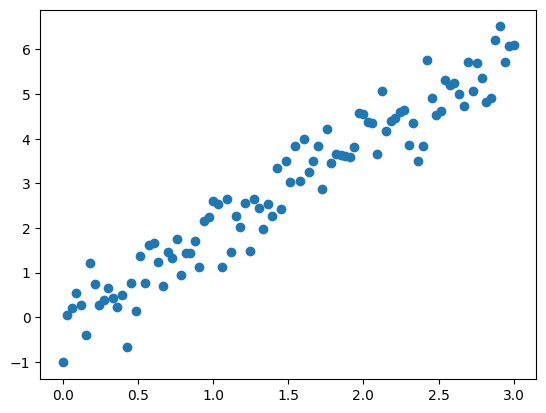

In [4]:
# lets try with some synthetic data
# generate synthetic dataset
X_1 = np.linspace(0,3,100)
y_1 = 2 * X_1+ np.random.normal(0,0.5,100)

plt.scatter(X_1,y_1)

In [5]:
simulated_X = np.array(
    [[1,2,3],
    [4,5,6],
    [7,8,9]]
)
new_simulated_X = np.hstack(
    [simulated_X, np.ones([simulated_X.shape[0],1], dtype=np.float64)]
)
new_simulated_X

array([[1., 2., 3., 1.],
       [4., 5., 6., 1.],
       [7., 8., 9., 1.]])

In [6]:
new_X_1 = np.vstack([X_1, np.ones(X_1.shape[0], dtype=np.float64)])
new_X_1 = new_X_1.transpose()
new_X_1

array([[0.        , 1.        ],
       [0.03030303, 1.        ],
       [0.06060606, 1.        ],
       [0.09090909, 1.        ],
       [0.12121212, 1.        ],
       [0.15151515, 1.        ],
       [0.18181818, 1.        ],
       [0.21212121, 1.        ],
       [0.24242424, 1.        ],
       [0.27272727, 1.        ],
       [0.3030303 , 1.        ],
       [0.33333333, 1.        ],
       [0.36363636, 1.        ],
       [0.39393939, 1.        ],
       [0.42424242, 1.        ],
       [0.45454545, 1.        ],
       [0.48484848, 1.        ],
       [0.51515152, 1.        ],
       [0.54545455, 1.        ],
       [0.57575758, 1.        ],
       [0.60606061, 1.        ],
       [0.63636364, 1.        ],
       [0.66666667, 1.        ],
       [0.6969697 , 1.        ],
       [0.72727273, 1.        ],
       [0.75757576, 1.        ],
       [0.78787879, 1.        ],
       [0.81818182, 1.        ],
       [0.84848485, 1.        ],
       [0.87878788, 1.        ],
       [0.

In [102]:
# initialize weights
example_weights = np.array([1,1], dtype = np.float64)
n_iter = 100
learning_rate = 0.01

for i in range(1, n_iter+1):
    example_weights, loss = basic_gradient_descent(new_X_1, y_1, example_weights, learning_rate)
    #print(example_weights)
    if i % 10 == 0:
        print(f'at iteration {i} the loss is :{loss}')

at iteration 10 the loss is :0.9437796604081826
at iteration 20 the loss is :0.7766712258544493
at iteration 30 the loss is :0.6914958956699454
at iteration 40 the loss is :0.6442911256252569
at iteration 50 the loss is :0.6148477162507795
at iteration 60 the loss is :0.5938691494536781
at iteration 70 the loss is :0.5770726313088113
at iteration 80 the loss is :0.5624791210079948
at iteration 90 the loss is :0.5491683649862463
at iteration 100 the loss is :0.5367069478884187


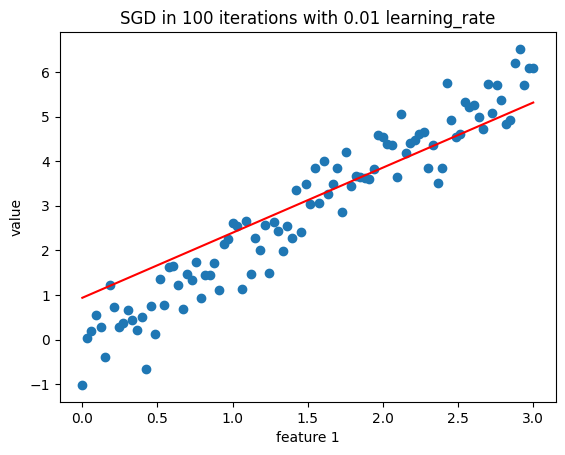

In [103]:
plt.scatter(X_1,y_1)

y_predict = example_weights[0] * X_1 + example_weights[1]
plt.plot(X_1,y_predict, 'r-')
plt.title(f'SGD in {n_iter} iterations with {learning_rate} learning_rate')
plt.ylabel('value')
plt.xlabel('feature 1');

### Gradient descent with tolerance (automatic stop)

In [104]:
def basic_gradient_descent_with_tolerance(X, y ,weights, learning_rate = 0.01, tolerance = 1e-06, n_iter = 100):
    y_actual = y
    proceeded_iter = 0
    print_interval = n_iter / 10
    loss_list = []
    for i in range(1, n_iter+1):
        y_predicted = np.sum( X * weights, axis=1 ) # step 1: calculate predicted values based on the regression model
        diff = (y_predicted - y_actual).reshape((y_predicted - y_actual).shape[0],1) # the difference is a (n,) one-dimensional array with n being the number of observations in the data, however it must be reshaped into a (n,1) two-dimensional array before it is able to be used to calculate the derivative with X array (which is also a 2 dimensional array) in the next step
        derivatives = np.mean(diff * X, axis=0) # step 2: calculate the derivatives, the mean of the product of diff (n, 1) array with each column, which represents one variable per column, is calculated through numpy broadcasting function 
        step = -learning_rate * derivatives # step 3: step for each variable/feature is calculated by scaling variable derivatives with learning_rate
        if np.all(np.abs(step) <= tolerance):
            print(f'iteration stops after {proceeded_iter} iters with step value:{step} ')
            break
        # update weights
        weights += step # step 4: a set of weights is updated by add step to the former weights
        loss = np.mean((y_actual - y_predicted)**2) # step 5: loss is calculated with updated weight set
        loss_list.append(loss)
        proceeded_iter += 1
        if i % print_interval == 0:
            print(f'at iteration {i} the loss is :{loss}')
    return weights, loss, proceeded_iter, loss_list

at iteration 10 the loss is :0.9437796604081826
at iteration 20 the loss is :0.7766712258544493
at iteration 30 the loss is :0.6914958956699454
at iteration 40 the loss is :0.6442911256252569
at iteration 50 the loss is :0.6148477162507795
at iteration 60 the loss is :0.5938691494536781
at iteration 70 the loss is :0.5770726313088113
at iteration 80 the loss is :0.5624791210079948
at iteration 90 the loss is :0.5491683649862463
at iteration 100 the loss is :0.5367069478884187
In total 100 iterations were performed to get final weights [1.458194   0.93827854] and final loss 0.5367069478884187


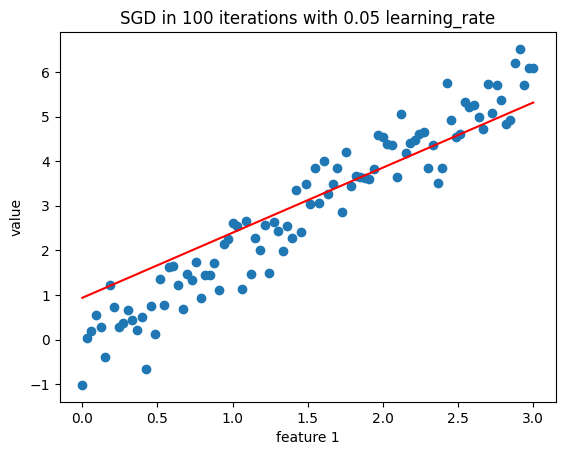

In [105]:
# initialize weights
example_weights = np.array([1,1], dtype = np.float64)
learning_rate = 0.05

# gradient descent
final_weights, final_loss, final_iter, loss_collect = basic_gradient_descent_with_tolerance(new_X_1, y_1, example_weights, learning_rate = 0.01)
print(f'In total {final_iter} iterations were performed to get final weights {final_weights} and final loss {final_loss}')

# plot
plt.scatter(X_1,y_1)

y_predict = final_weights[0] * X_1 + final_weights[1]
plt.plot(X_1,y_predict, 'r-');
plt.title(f'SGD in {final_iter} iterations with {learning_rate} learning_rate')
plt.ylabel('value')
plt.xlabel('feature 1');

at iteration 100 the loss is :0.2996440958489854
at iteration 200 the loss is :0.24760462395989197
at iteration 300 the loss is :0.24067360072291932
at iteration 400 the loss is :0.2397504729245851
at iteration 500 the loss is :0.23962752355579475
at iteration 600 the loss is :0.2396111481987605
at iteration 700 the loss is :0.23960896720083724
at iteration 800 the loss is :0.23960867671850258
at iteration 900 the loss is :0.23960863802979693
iteration stops after 941 iters with step value:[ 5.31757360e-07 -9.97776983e-07] 
In total 941 iterations were performed to get final weights [ 2.03605759 -0.12934149] and final loss 0.2396086346862652


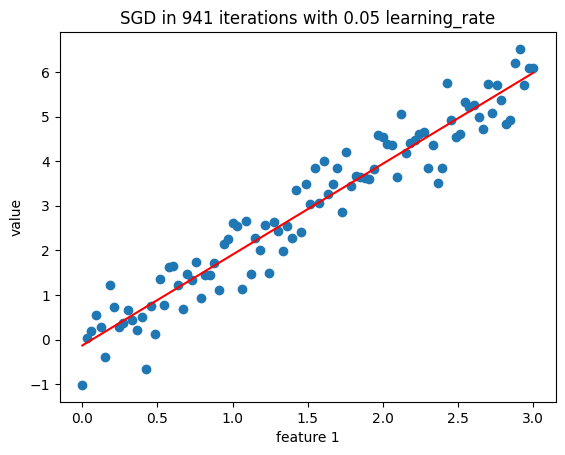

In [106]:
# initialize weights
example_weights = np.array([1,1], dtype = np.float64)
learning_rate = 0.05
n_iter = 1000

# gradient descent
final_weights, final_loss, final_iter, loss_collect = basic_gradient_descent_with_tolerance(new_X_1, y_1, example_weights, learning_rate = learning_rate, n_iter = n_iter)
print(f'In total {final_iter} iterations were performed to get final weights {final_weights} and final loss {final_loss}')

# plot
plt.scatter(X_1,y_1)

y_predict = final_weights[0] * X_1 + final_weights[1]
plt.plot(X_1,y_predict, 'r-');
plt.title(f'SGD in {final_iter} iterations with {learning_rate} learning_rate')
plt.ylabel('value')
plt.xlabel('feature 1');

at iteration 1000 the loss is :0.24760526359549473
at iteration 2000 the loss is :0.23975280447671055
at iteration 3000 the loss is :0.23961123138945895
iteration stops after 3922 iters with step value:[ 5.32237126e-07 -9.98677204e-07] 
In total 3922 iterations were performed to get final weights [ 2.03584527 -0.1289431 ] and final loss 0.23960869618637232


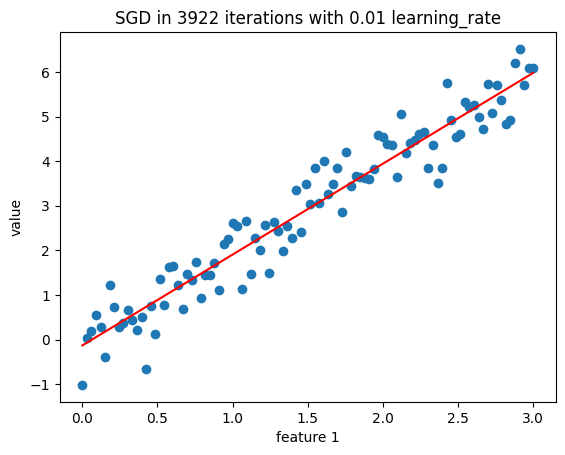

In [108]:
# initialize weights
example_weights = np.array([1,1], dtype = np.float64)
learning_rate = 0.01
n_iter = 10000

# gradient descent
final_weights, final_loss, final_iter, loss_collect = basic_gradient_descent_with_tolerance(new_X_1, y_1, example_weights, learning_rate = learning_rate, n_iter = n_iter)
print(f'In total {final_iter} iterations were performed to get final weights {final_weights} and final loss {final_loss}')

# plot
plt.scatter(X_1,y_1)

y_predict = final_weights[0] * X_1 + final_weights[1]
plt.plot(X_1,y_predict, 'r-');
plt.title(f'SGD in {final_iter} iterations with {learning_rate} learning_rate')
plt.ylabel('value')
plt.xlabel('feature 1');

### Stochastic graident descent with momentum

In [109]:
def gradient_descent_with_momentum(X, y ,weights, learning_rate = 0.05, tolerance = 1e-06, n_iter = 100, decay_rate = 0.02, batch_size = 1):
    n_obs = X.shape[0]
    random_indices = np.random.permutation(n_obs)
    step = 0
    proceeded_iter = 0
    print_interval = n_iter / 10
    loss_list = []
    
    for ite in range(1, n_iter+1):
        X_shuffled = X[random_indices]
        y_shuffled = y[random_indices]
        n_batch = 0

        for i in range(0, n_obs, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            y_predicted_batch = np.sum( X_batch * weights, axis=1 ) # step 1: calculate predicted values based on the regression model
            diff = (y_predicted_batch - y_batch).reshape((y_predicted_batch - y_batch).shape[0],1) # the difference is a (n,) one-dimensional array with n being the number of observations in the data, however it must be reshaped into a (n,1) two-dimensional array before it is able to be used to calculate the derivative with X array (which is also a 2 dimensional array) in the next step
            derivatives = np.mean(diff * X_batch, axis=0) # step 2: calculate the derivatives, the mean of the product of diff (n, 1) array with each column, which represents one variable per column, is calculated through numpy broadcasting function 
            step = decay_rate * step -learning_rate * derivatives # step 3: step for each variable/feature is calculated by scaling variable derivatives with learning_rate
            if np.all(np.abs(step) <= tolerance):
                print(f'ideal params were found at {proceeded_iter} iteration and {n_batch}th batches')
                break
            # update weights
            weights += step # step 4: a set of weights is updated by add step to the former weights
            n_batch += 1

        y_predicted = np.sum( X_shuffled * weights, axis = 1)
        loss = np.mean((y_shuffled - y_predicted)**2) # step 5: loss is calculated with updated weight set
        loss_list.append(loss)
        #print(f'at iteration {ite} the loss is :{loss:.4f}')
        proceeded_iter += 1
    return weights, loss, proceeded_iter, loss_list

In total 3922 iterations were performed to get final weights [ 2.03584527 -0.1289431 ] and final loss 0.2396


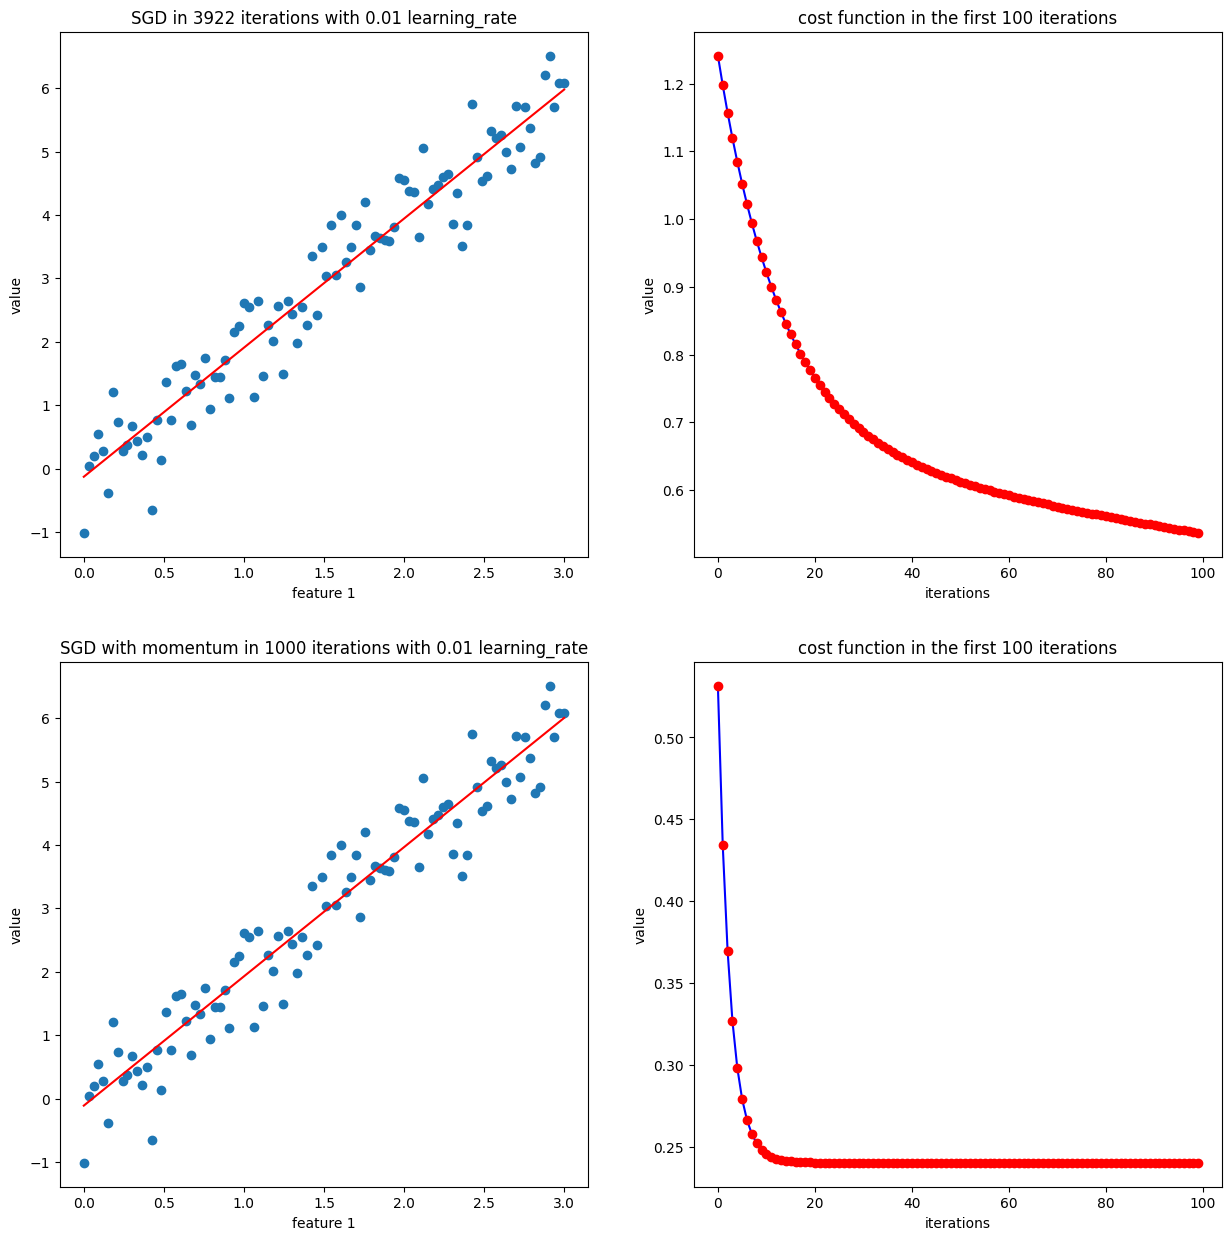

In [114]:
# initialize weights
example_weights = np.array([1,1], dtype = np.float64)
learning_rate = 0.01
n_iter = 1000
decay_rate = 0.01
batch_size = 1

# gradient descent
final_weights_1, final_loss_1, final_iter_1, loss_collect_1= gradient_descent_with_momentum(new_X_1, y_1, example_weights, learning_rate = learning_rate, n_iter = n_iter, decay_rate = decay_rate, batch_size = batch_size)
print(f'In total {final_iter} iterations were performed to get final weights {final_weights} and final loss {final_loss:.4f}')

# plot
n_display = 100
fig, axes = plt.subplots(2,2, figsize=(15,15))
axes[0,0].scatter(X_1,y_1)
y_predict = final_weights[0] * X_1 + final_weights[1]
axes[0,0].plot(X_1,y_predict, 'r-')
axes[0,0].set_title(f'SGD in {final_iter} iterations with {learning_rate} learning_rate')
axes[0,0].set_xlabel('feature 1')
axes[0,0].set_ylabel('value')

axes[0,1].plot(range(n_display), loss_collect[0:n_display], 'b-')
axes[0,1].plot(range(n_display), loss_collect[0:n_display], 'ro')
axes[0,1].set_title(f'cost function in the first {n_display} iterations')
axes[0,1].set_xlabel('iterations')
axes[0,1].set_ylabel('value')

axes[1,0].scatter(X_1,y_1)
y_predict_1 = final_weights_1[0] * X_1 + final_weights_1[1]
axes[1,0].plot(X_1,y_predict_1, 'r-')
axes[1,0].set_title(f'SGD with momentum in {final_iter_1} iterations with {learning_rate} learning_rate')
axes[1,0].set_xlabel('feature 1')
axes[1,0].set_ylabel('value')

axes[1,1].plot(range(n_display), loss_collect_1[0:n_display], 'b-')
axes[1,1].plot(range(n_display), loss_collect_1[0:n_display], 'ro')
axes[1,1].set_title(f'cost function in the first {n_display} iterations')
axes[1,1].set_xlabel('iterations')
axes[1,1].set_ylabel('value');

when compare simple gradient descent algorithm with gradient descent with momentum, in our case by training both models on a synthetic dataset with 2 variables and 100 data points, we see that with the same learning rate and number of iterations, GD with momentum converge faster with arriving at the optimal values/params alreadt at 15 iters whereas till 100 simple GD has not reached the global minimum.

The problems is:
the tolerance threshold we set has never been reached in GD with momentum, which means fine-tune effect of GD with momentum might be not as optimal as simple GD on small dataset. (step is two big somehow compared to simple GD)
GD with momentum is advantageous if the dataset is large and complex! e.g. cost function is a non-convex function and has multiple local minima on the whole scale.